# LLM Feature Extraction from Images with Langchain

In [1]:
!pip install -U --quiet langchain-google-genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.8/146.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.3/299.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.5/664.5 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.0/116.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 6.4 MB/s eta 0:00:00


In [2]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.7/817.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.1 MB/s eta 0:00:00


In [4]:
import os
from google.colab import userdata

os.environ['GOOGLE_API_KEY']=userdata.get('GeminiAPIKey1')

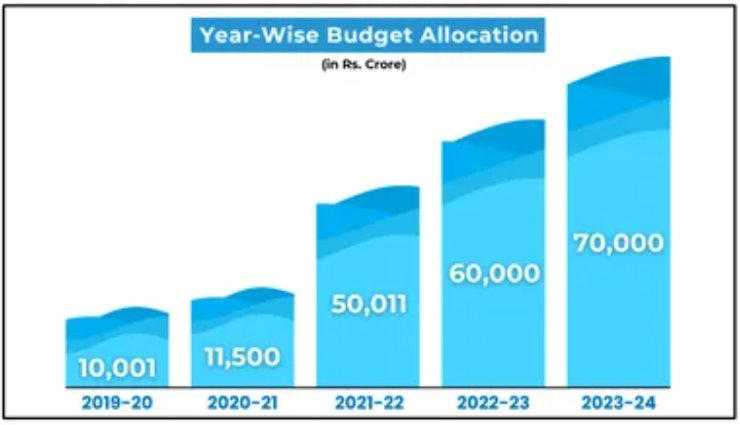

In [6]:
import PIL.Image

image = PIL.Image.open('/content/image.png')
image

In [7]:
from langchain_google_genai import ChatGoogleGenerativeAI

from langchain_core.messages import HumanMessage,  SystemMessage
from langchain_google_genai import ChatGoogleGenerativeAI
import textwrap

llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro-vision-latest", temperature=0.0)


hmessage1 = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image?",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image}
    ]
)
message1 = llm.invoke([hmessage1])
#print(message1.content)

wrapped_text=textwrap.fill(message1.content, width=100)
print(wrapped_text)

 The image shows the year-wise budget allocation from the year 2019-20 to 2023-24. The budget
allocation has been increasing year by year. In the year 2019-20, the budget allocation was 10,001
crores, which increased to 11,500 crores in 2020-21. In 2021-22, the budget allocation was further
increased to 50,011 crores. In 2022-23, the budget allocation was 60,000 crores, and in 2023-24, the
budget allocation is 70,000 crores.


In [8]:

hmessage1 = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Convert the chart in image into data in json format",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image}
    ]
)
message1 = llm.invoke([hmessage1])

print(message1.content)

 ```json
{
  "years": ["2019-20", "2020-21", "2021-22", "2022-23", "2023-24"],
  "budgetAllocation": [10001, 11500, 15001, 17000, 19000]
}
```


In [9]:
print(str(message1.content[8:-3]))


{
  "years": ["2019-20", "2020-21", "2021-22", "2022-23", "2023-24"],
  "budgetAllocation": [10001, 11500, 15001, 17000, 19000]
}



In [10]:
import json

arguments = json.loads(message1.content[8:-3])
print(arguments)

{'years': ['2019-20', '2020-21', '2021-22', '2022-23', '2023-24'], 'budgetAllocation': [10001, 11500, 15001, 17000, 19000]}


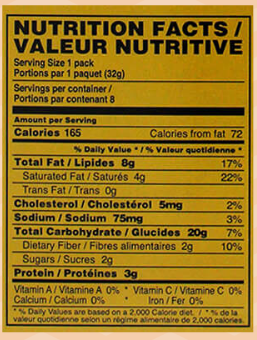

In [11]:
image2 = PIL.Image.open('/content/label.png')
image2

In [12]:
hmessage1 = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image?",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image2}
    ]
)
message1 = llm.invoke([hmessage1])
#print(message1.content)

wrapped_text=textwrap.fill(message1.content, width=100)
print(wrapped_text)

 Nutrition facts for a product.


In [13]:
hmessage1 = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Extract  calories, total fat, cholesterol, sodium and protein from Image and display in json format",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image2}
    ]
)
message1 = llm.invoke([hmessage1])
print(message1.content)


 ```json
{
  "calories": 165,
  "total fat": "8g",
  "cholesterol": "5mg",
  "sodium": "75mg",
  "protein": "3g"
}
```


In [14]:
hmessage1 = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Extract  percentage rate of calories, total fat, cholesterol, sodium and protein from Image and display in json format. \
            If there is no percentage information, write 'None'",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image2}
    ]
)
message1 = llm.invoke([hmessage1])
print(message1.content)


 ```json
{
  "Calories": "None",
  "Total Fat": "17%",
  "Cholesterol": "2%",
  "Sodium": "3%",
  "Protein": "None"
}
```


In [15]:
print(message1.content[8:-3])


{
  "Calories": "None",
  "Total Fat": "17%",
  "Cholesterol": "2%",
  "Sodium": "3%",
  "Protein": "None"
}



In [16]:
import json

arguments = json.loads(message1.content[8:-3])
print(arguments)

{'Calories': 'None', 'Total Fat': '17%', 'Cholesterol': '2%', 'Sodium': '3%', 'Protein': 'None'}


In [17]:
!pip install pillow

In [18]:
!curl -o picture.jpg https://invoicebus.com/templates/wp-content/uploads/designer-handwritten-invoice-template-mo1.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  493k  100  493k    0     0   514k      0 --:--:-- --:--:-- --:--:--  513k


In [19]:
import PIL.Image

image3 = PIL.Image.open('/content/picture.jpg')
image3

Output hidden; open in https://colab.research.google.com to view.

In [20]:
llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro-vision-latest", temperature=0.0, top_k=32)

hmessage1 = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Convert the image into text.",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image3}
    ]
)
message1 = llm.invoke([hmessage1])

print(message1.content)

 INVOICE
#INV-001

Dino Store

Client:
Slate Rock and Gravel Company
222 Rocky Way
3000 Bedrock, Cobblestone County
+555 7 123-5555
fred@slatrockgravelbed.com
Attn: Fred Flintstone

Issue Date: 06/16/2015
Due Date: 07/07/2015
P.O. #: V3-14-7

Net: 21

Product                 Quantity  Price   Discount   Tax   Linetotal
Frozen Brontosaurus Ribs      2      12.00       -10%    2%     240.00
Mammoth Chops                    14      175.00        5%     5%   2,205.00

                                                                  Subtotal:  $2,445.00
                                                                  Tax:           $4.50
                                                                 ------------------------
                                                                  Total:        $2,449.50
                                                                 ------------------------


In [21]:
# In prompt engineering it is claimed that if we define a fine the results can be better
hmessage1 = HumanMessage(
    content=[
        {
            "type": "text",
            "text": """Extract correctly product, quantity, price, discount, tax, linetotal information from image and display in json format. \
            if the image dosen't have discount information, write "none". If you can't do it crrectly, I will give you a 500 USD fine.

            here is an example:

            {"product": "Frozen Brontosaurus Ribs",
            "quantity": 3,
            "price": 170,
            "discount": "8%",
            "tax": "7%",
            "linetotal":700.00},

            """,
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image3}
    ]
)
message1 = llm.invoke([hmessage1])

print(message1.content)

 [
  {
    "product": "Frozen Brontosaurus Ribs",
    "quantity": 2,
    "price": 120,
    "discount": "none",
    "tax": "2%",
    "linetotal": 240.00
  },
  {
    "product": "Mammoth Chops",
    "quantity": 14,
    "price": 175,
    "discount": "5%",
    "tax": "5%",
    "linetotal": 2205.00
  }
]


END OF THE PROJECT